# Part I: Importing Libraries and Data

In [342]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

In [343]:
pull_req_data = pd.read_csv('./preprocessed_data_v3.csv')

In [344]:
pull_req_data.head(n=10)

,slug,gh_team_size,commits,git_num_commits,gh_num_issue_comments,general_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,...,Id,state,merged,merge_commit_sha,delta_mins_merge,delta_mins_close,open_issues_count,network_count,watchers_count,subscribers_count
0,aodn/aodn-portal,4,1,1,0,0,0,0,0,1,...,70072,closed,True,c3f6c953580397f684d76ab1952607c509d964b6,2.4500,2.4500,17,12,7,21
1,aodn/aodn-portal,5,1,1,0,0,0,0,0,2,...,70071,closed,True,077ab02e5ca9dac5d3929320c689b31ae611af4f,75.7167,75.7167,17,12,7,21
2,aodn/aodn-portal,5,1,1,0,1,0,0,0,11472,...,59144,open,False,de03e9827db84d1cf9ca9196021f6f1fbf85fe4a,-1.0000,-1.0000,17,12,7,21
3,aodn/aodn-portal,5,1,1,0,4,0,3,0,22,...,70062,closed,True,2f8a40a7c821ebafb1bd9ab865ea00a6a4ab19e5,21.8000,21.8000,17,12,7,21
4,aodn/aodn-portal,5,2,1,0,2,0,1,0,5,...,59143,open,False,fd1115de4c2e32f9e46c1dc6edc011d0c83628fa,-1.0000,-1.0000,17,12,7,21
5,aodn/aodn-portal,6,2,1,0,2,0,1,0,5,...,59143,open,False,fd1115de4c2e32f9e46c1dc6edc011d0c83628fa,-1.0000,-1.0000,17,12,7,21
6,aodn/aodn-portal,7,1,1,0,0,0,0,0,2,...,37783,closed,True,6aedc7cf7ad3f00c0aca86ec61c356c21d8e2fe1,210.1000,210.1000,17,12,7,21
7,aodn/aodn-portal,7,1,1,0,0,0,0,0,7,...,37782,closed,True,369166a58afb4fcfc7ddab09be3f71d8718b5f89,152.9670,152.9670,17,12,7,21
8,aodn/aodn-portal,7,1,1,0,0,0,0,0,7,...,37781,closed,True,b1898c536f5b8d20f6108e37960f1e9f4864fc80,1250.7300,1250.7300,17,12,7,21
9,aodn/aodn-portal,7,1,1,0,1,0,0,0,108,...,37786,closed,True,4d6242f108ed7d4717b3090c13795091c95ef9e7,1199.3300,1199.3300,17,12,7,21


In [345]:
pull_req_data.shape

(36665, 43)

# Part II: Basic Statistics

In [346]:
pull_req_data.describe()

,gh_team_size,commits,git_num_commits,gh_num_issue_comments,general_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,...,gh_description_complexity,git_num_committers,Id,merged,delta_mins_merge,delta_mins_close,open_issues_count,network_count,watchers_count,subscribers_count
count,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,...,36665.000000,36665.000000,36665.000000,36665,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000
mean,25.193809,6.010719,1.717878,0.724942,3.349707,0.636902,1.281931,0.658257,349.076667,196.921969,...,44.388081,1.166562,42128.905223,0.698732,376.940854,491.254493,240.532115,401.012082,1321.660030,112.101923
std,18.413552,48.522909,2.986312,1.929189,6.354062,3.607060,6.136695,5.808104,2142.849869,1926.777871,...,140.761117,0.398071,22268.978586,0.458815,473.098729,487.162215,198.518094,407.644410,1460.298317,98.751025
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,False,-1.000000,-1.000000,17.000000,5.000000,7.000000,13.000000
25%,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,...,9.000000,1.000000,31198.000000,0,-1.000000,40.800000,99.000000,126.000000,212.000000,48.000000
50%,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,4.000000,...,21.000000,1.000000,38912.000000,1,109.617000,302.367000,171.000000,242.000000,767.000000,85.000000
75%,39.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,94.000000,22.000000,...,46.000000,1.000000,59254.000000,1,747.167000,938.117000,324.000000,626.000000,2217.000000,138.000000
max,89.000000,1887.000000,151.000000,39.000000,136.000000,167.000000,327.000000,661.000000,116015.000000,43469.000000,...,7476.000000,6.000000,81785.000000,True,1439.200000,1439.200000,1818.000000,4883.000000,20119.000000,1033.000000


In [347]:
total_pull_req = len(pull_req_data)
pull_reqs_accepted = len(pull_req_data[pull_req_data["merged"] == True])
print 'Total pull requests in our given data = ', total_pull_req
print 'Accepted pull requests = ', pull_reqs_accepted
print 'Percentage of Accepted pull requests = %.2f' % ((float(pull_reqs_accepted)/float(total_pull_req)) * 100)
#perc_accepted = len(pulllen(pull_req_data[pull_req_data["merged"] == True])

Total pull requests in our given data =  36665
Accepted pull requests =  25619
Percentage of Accepted pull requests = 69.87


# Preprocessing (Split Target Feature and Columns)

In [348]:
def convertToNonNegatives(x):
    return round(x, -1)

In [349]:
pull_req_data['delta_mins_merge'] = pull_req_data['delta_mins_merge'].apply(convertToNonNegatives)
pull_req_data['delta_mins_close'] = pull_req_data['delta_mins_close'].apply(convertToNonNegatives)

In [350]:
pull_req_data['delta_mins_merge'].describe()

count    36665.000000
mean       377.207964
std        472.810602
min          0.000000
25%         -0.000000
50%        110.000000
75%        750.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

In [351]:
# This will be our target variable
Y = np.array(pull_req_data['merged'].apply(int))
Y
#dropped_features = pull_req_data.drop(['Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
#dropped_features

array([1, 1, 0, ..., 1, 1, 1])

In [352]:
# Drop these features because they are redundant / we dont need to feed them in the ML model
# Note here:- We are removing delta_mins_merge and delta_mins_close because from the user's perspective
# They are not controllable
dropped_features = pull_req_data.drop(['delta_mins_merge', 'delta_mins_close', 'slug', 'Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
X = dropped_features.as_matrix().astype(np.float)
X.shape

(36665, 36)

In [353]:
features = dropped_features.columns
pprint.pprint(features)

Index([u'gh_team_size', u'commits', u'git_num_commits',
       u'gh_num_issue_comments', u'general_comments', u'num_commit_comments',
       u'pull_req_comments', u'gh_num_pr_comments', u'additions', u'deletions',
       u'churn', u'changed_files', u'gh_src_churn', u'gh_test_churn',
       u'gh_files_added', u'gh_files_deleted', u'gh_files_modified',
       u'gh_tests_added', u'gh_tests_deleted', u'gh_src_files',
       u'gh_doc_files', u'gh_other_files', u'gh_commits_on_files_touched',
       u'gh_sloc', u'gh_test_lines_per_kloc', u'gh_test_cases_per_kloc',
       u'gh_asserts_cases_per_kloc', u'gh_by_core_team_member', u'title_len',
       u'desc_len', u'gh_description_complexity', u'git_num_committers',
       u'open_issues_count', u'network_count', u'watchers_count',
       u'subscribers_count'],
      dtype='object')


# Merge time statistics

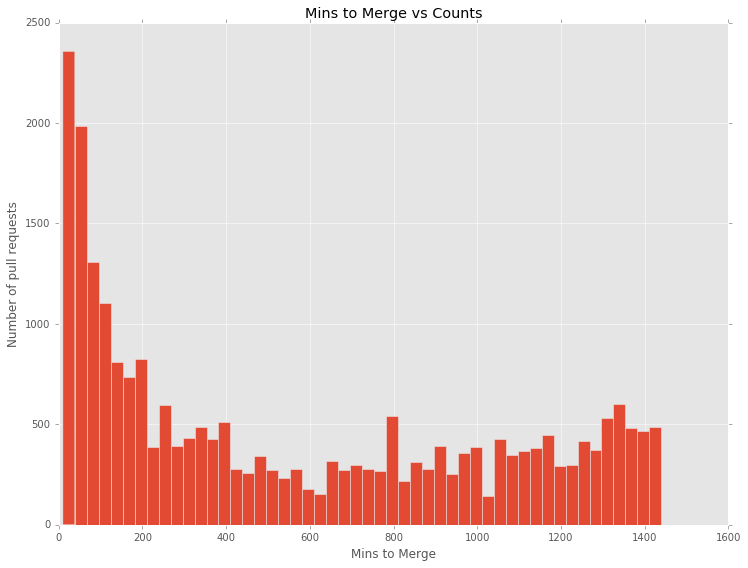

In [354]:
plt.rcParams["figure.figsize"] = [12, 9]
data_to_graph = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])['delta_mins_merge']
plt.hist(data_to_graph, bins=50)
plt.title("Mins to Merge vs Counts")
plt.xlabel("Mins to Merge")
plt.ylabel("Number of pull requests")
plt.show()

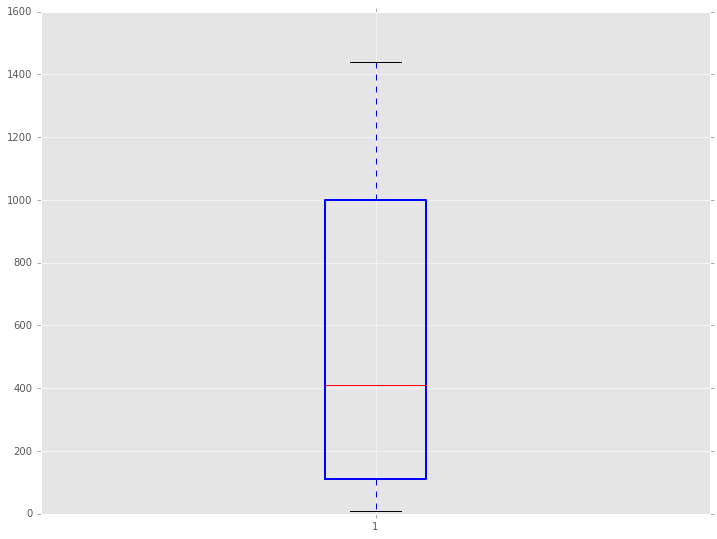

In [355]:
#data_to_graph
bp = plt.boxplot(np.array(data_to_graph))
#bp['boxes'].set( color='#7570b3', linewidth=2)
#bp['boxes'].set( facecolor = '#1b9e77' )
#bp.show()
#bp['boxes']
plt.setp(bp['boxes'], color='Blue', linewidth=2)
plt.show()

In [356]:
data_to_graph.describe()

count    24583.000000
mean       562.597323
std        478.665167
min         10.000000
25%        110.000000
50%        410.000000
75%       1000.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

# Part III: Feature Selection

In [357]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit
import pprint

# Trees Ensemble Feature Selection

In [358]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
print importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

scores = []
names = dropped_features.columns
# Print the feature ranking
#print 'Names = ', names
#print("Feature ranking:")

for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    scores.append((importances[indices[f]], names[indices[f]]))

pprint.pprint(sorted(scores, reverse=True))
# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

[ 0.01709046  0.05754236  0.00617921  0.00765141  0.08015672  0.00632764
  0.03276937  0.00559938  0.06158807  0.05198219  0.0573196   0.05448476
  0.00915661  0.00752752  0.0059956   0.00358885  0.00888576  0.0005203
  0.00227517  0.0086844   0.00671462  0.00676878  0.01114658  0.0169491
  0.01289333  0.01296739  0.01314566  0.00366175  0.06690956  0.06970357
  0.01801284  0.00479992  0.06659439  0.07415627  0.06380508  0.06644577]
[(0.080156718028009291, 'general_comments'),
 (0.074156274442275183, 'network_count'),
 (0.069703574465698262, 'desc_len'),
 (0.066909555257428865, 'title_len'),
 (0.06659439290978543, 'open_issues_count'),
 (0.066445773880087391, 'subscribers_count'),
 (0.063805076374188113, 'watchers_count'),
 (0.061588070660564181, 'additions'),
 (0.057542361376659433, 'commits'),
 (0.05731959534495603, 'churn'),
 (0.054484757186676565, 'changed_files'),
 (0.051982189520594843, 'deletions'),
 (0.032769370112297934, 'pull_req_comments'),
 (0.018012840087765825, 'gh_descri

In [359]:
rand_for = RandomForestRegressor(n_estimators=50, max_depth=4)
scores = []
names = dropped_features.columns
for i in range(X.shape[1]):
    score = cross_val_score(rand_for, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
pprint.pprint(sorted(scores, reverse=True))

[(0.214, 'open_issues_count'),
 (0.205, 'network_count'),
 (0.193, 'watchers_count'),
 (0.176, 'subscribers_count'),
 (0.068, 'general_comments'),
 (0.054, 'desc_len'),
 (0.044, 'additions'),
 (0.043, 'commits'),
 (0.035, 'churn'),
 (0.021, 'title_len'),
 (0.019, 'changed_files'),
 (0.015, 'deletions'),
 (0.008, 'gh_test_lines_per_kloc'),
 (0.006, 'gh_sloc'),
 (0.005, 'pull_req_comments'),
 (0.005, 'gh_test_cases_per_kloc'),
 (0.005, 'gh_asserts_cases_per_kloc'),
 (0.004, 'gh_team_size'),
 (0.004, 'gh_description_complexity'),
 (-0.0, 'git_num_committers'),
 (-0.0, 'git_num_commits'),
 (-0.0, 'gh_src_churn'),
 (-0.0, 'gh_num_issue_comments'),
 (0.0, 'gh_files_modified'),
 (-0.0, 'gh_files_added'),
 (-0.0, 'gh_doc_files'),
 (-0.0, 'gh_commits_on_files_touched'),
 (0.0, 'gh_by_core_team_member'),
 (-0.001, 'num_commit_comments'),
 (-0.001, 'gh_tests_deleted'),
 (-0.001, 'gh_tests_added'),
 (-0.001, 'gh_test_churn'),
 (-0.001, 'gh_src_files'),
 (-0.001, 'gh_other_files'),
 (-0.001, 'gh_nu

# Univariate Feature Selection

In [360]:
ch2 = SelectKBest(chi2,"all")
X_train = ch2.fit_transform(X, Y)
top_ranked_features = sorted(enumerate(ch2.scores_),key=lambda x:x[1], reverse=True)[:32]
for index,(position,score) in enumerate(top_ranked_features):
    print '%d) %s - %f' % (index+1, names[position], score)
#top_ranked_features

1) churn - 9721908.650009
2) additions - 6989824.738701
3) gh_sloc - 4975088.599997
4) deletions - 2795072.252169
5) watchers_count - 1424262.074315
6) desc_len - 581175.353609
7) network_count - 418963.142957
8) changed_files - 301806.253978
9) commits - 160693.487392
10) open_issues_count - 134188.357613
11) subscribers_count - 54135.593005
12) gh_test_lines_per_kloc - 12021.406493
13) general_comments - 10708.764344
14) gh_description_complexity - 7064.366159
15) gh_src_churn - 1426.750542
16) gh_test_churn - 1074.534246
17) gh_commits_on_files_touched - 722.034010
18) title_len - 592.278876
19) gh_doc_files - 551.847572
20) gh_test_cases_per_kloc - 406.256094
21) pull_req_comments - 368.630404
22) gh_files_modified - 197.755180
23) gh_tests_deleted - 94.946529
24) gh_asserts_cases_per_kloc - 47.297462
25) gh_num_pr_comments - 36.206189
26) git_num_commits - 27.271028
27) gh_team_size - 26.378798
28) gh_tests_added - 14.348207
29) gh_src_files - 11.359242
30) gh_files_added - 4.9705

## Recursive Feature Elimination

In [361]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
top_n_features = 10
# create the RFE model and select top 10 attributes
rfe = RFE(model, top_n_features)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

scores = []
for feature_name,rank in zip(names, rfe.ranking_):
    scores.append((feature_name, rank))

pprint.pprint(sorted(scores, key=lambda x:x[1]))


[('commits', 1),
 ('git_num_commits', 1),
 ('general_comments', 1),
 ('num_commit_comments', 1),
 ('pull_req_comments', 1),
 ('gh_tests_added', 1),
 ('gh_doc_files', 1),
 ('gh_by_core_team_member', 1),
 ('title_len', 1),
 ('git_num_committers', 1),
 ('gh_team_size', 2),
 ('subscribers_count', 3),
 ('open_issues_count', 4),
 ('gh_description_complexity', 5),
 ('changed_files', 6),
 ('network_count', 7),
 ('gh_test_cases_per_kloc', 8),
 ('gh_asserts_cases_per_kloc', 9),
 ('gh_num_issue_comments', 10),
 ('watchers_count', 11),
 ('gh_files_deleted', 12),
 ('gh_src_files', 13),
 ('gh_other_files', 14),
 ('deletions', 15),
 ('desc_len', 16),
 ('gh_num_pr_comments', 17),
 ('additions', 18),
 ('churn', 19),
 ('gh_files_added', 20),
 ('gh_tests_deleted', 21),
 ('gh_files_modified', 22),
 ('gh_commits_on_files_touched', 23),
 ('gh_test_churn', 24),
 ('gh_test_lines_per_kloc', 25),
 ('gh_src_churn', 26),
 ('gh_sloc', 27)]


# Part IV: Modelling Phase

In [364]:
# Take only the representative features using previous phase
features = [
'general_comments',
'desc_len',
'commits',
'additions',
'churn',
'title_len',
'changed_files',
'deletions',
'gh_test_lines_per_kloc',
'gh_sloc',
'open_issues_count',
'network_count',
'watchers_count',
'subscribers_count'
]
# 'gh_asserts_cases_per_kloc',
# 'pull_req_comments',
# 'gh_test_cases_per_kloc',
# 'gh_description_complexity',
# 'gh_team_size']
X_new = dropped_features[features].as_matrix().astype(np.float)
X_new.shape


(36665, 14)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.20, random_state = 7)
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(29332, 14)
(29332,)
(7333, 14)
(7333,)


In [366]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [367]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.56      0.17      0.26      2195
          1       0.73      0.94      0.82      5138

avg / total       0.68      0.71      0.65      7333

[[ 375 1820]
 [ 299 4839]]


0.7110323196508932

### k-Nearest Neighbor

In [368]:
# fit a logistic regression model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.70      0.57      0.63      2195
          1       0.83      0.89      0.86      5138

avg / total       0.79      0.80      0.79      7333

[[1247  948]
 [ 543 4595]]


0.79667257602618302

### Decision Trees

In [369]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(max_depth=40,criterion="entropy", min_samples_split=2)
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      2195
          1       0.99      0.99      0.99      5138

avg / total       0.99      0.99      0.99      7333

[[2132   63]
 [  46 5092]]


0.98513568798581752

### Random Forests

In [370]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      2195
          1       0.99      0.99      0.99      5138

avg / total       0.99      0.99      0.99      7333

[[2136   59]
 [  38 5100]]


0.9867721260057275

### Adaboost

In [371]:
clf_random_forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=600)
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.77      0.40      0.52      2195
          1       0.79      0.95      0.86      5138

avg / total       0.78      0.78      0.76      7333

[[ 875 1320]
 [ 264 4874]]


0.78399018137188059

In [372]:
from sklearn import svm

### SVM 

In [373]:
# fit a logistic regression model to the data
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      0.25      0.40      2195
          1       0.76      1.00      0.86      5138

avg / total       0.83      0.77      0.72      7333

[[ 542 1653]
 [   1 5137]]


0.77444429292240557

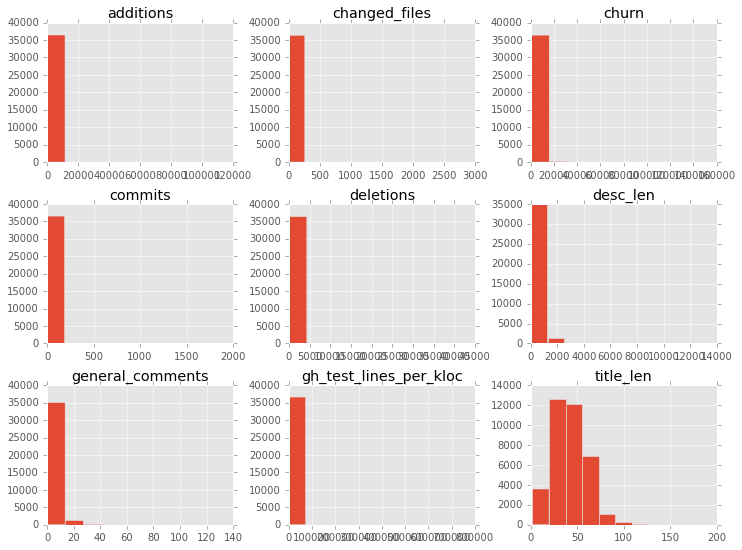

In [328]:
plt.rcParams["figure.figsize"] = [12, 9]
dropped_features[features].hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1890cae90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x145d33f90>]], dtype=object)

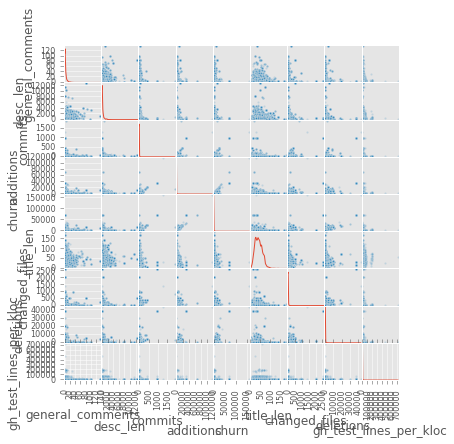

In [329]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dropped_features[features], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [336]:
pull_req_data[pull_req_data['merged'] == False][["title_len", "desc_len"]].describe()

,title_len,desc_len
count,11046.000000,11046.000000
mean,42.998189,385.318124
std,19.877707,821.803375
min,2.000000,0.000000
25%,29.000000,52.000000
50%,41.000000,156.500000
75%,55.000000,407.000000
max,168.000000,12687.000000


In [337]:
pull_req_data[pull_req_data['merged'] == True][["title_len", "desc_len"]].describe()

,title_len,desc_len
count,25619.000000,25619.000000
mean,41.208322,239.270034
std,17.805602,514.741231
min,3.000000,0.000000
25%,27.000000,10.000000
50%,40.000000,84.000000
75%,54.000000,241.000000
max,180.000000,11324.000000


In [341]:
pull_req_data[pull_req_data['merged'] == False][["commits", "additions", "deletions"]].describe()

,commits,additions,deletions
count,11046.000000,11046.000000,11046.000000
mean,13.827268,741.944324,383.515390
std,87.508245,3679.574488,3219.612297
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,2.000000,29.000000,3.000000
75%,3.000000,128.000000,20.000000
max,1887.000000,116015.000000,43469.000000


In [340]:
pull_req_data[pull_req_data['merged'] == True][["commits", "additions", "deletions"]].describe()

,commits,additions,deletions
count,25619.000000,25619.000000,25619.000000
mean,2.640501,179.686131,116.469534
std,5.515381,799.444407,906.949928
min,1.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000
50%,1.000000,17.000000,4.000000
75%,2.000000,79.000000,22.000000
max,158.000000,28285.000000,29888.000000
